## Visualizaciones de datos

Para llevar a cabo el análisis descriptivo de nuestros datos, hacemos uso de diversos gráficos para recopilar más información que utilizaremos posteriormente en el proceso de ciencia de datos al construir nuestros modelos. Es imprescindible conocer las librerías de Python que nos permiten generar estas visualizaciones, como `matplotlib` y `seaborn`. También `pandas` tiene algunos métodos de visualización.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url='https://drive.google.com/uc?id=1_uYmhihRAPXkYky1G_cJri5IV0-szgjP'
titanic=pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Line chart

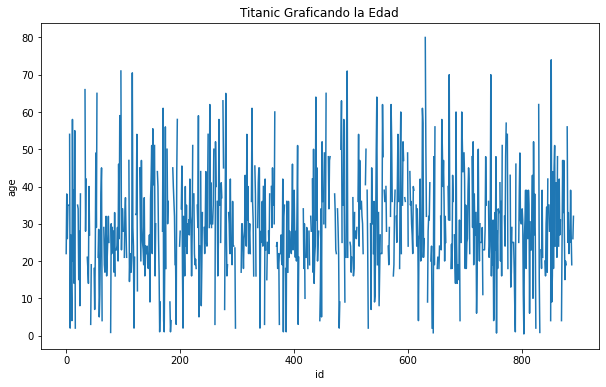

In [ ]:
# Comencemos con un gráfico simple, al no colocar X se asume que x es cada uno de los registros.
plt.figure(figsize=(10,6))
plt.plot(titanic['Age'])
plt.title('Titanic Graficando la Edad')
plt.xlabel('id')
plt.ylabel('age')
plt.show()


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Histograma de edad')

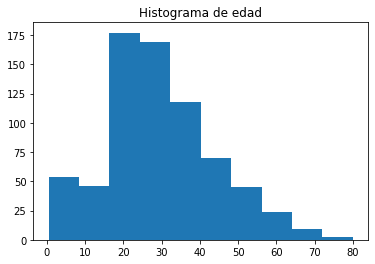

In [ ]:
plt.hist(titanic['Age'])
plt.title('Histograma de edad')

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

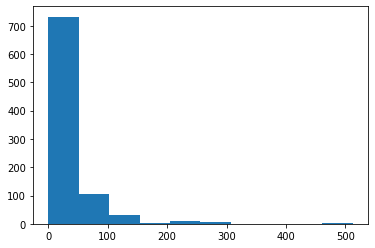

In [ ]:
plt.hist(titanic.Fare)

In [ ]:
?plt.hist()

### Histogram usando seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


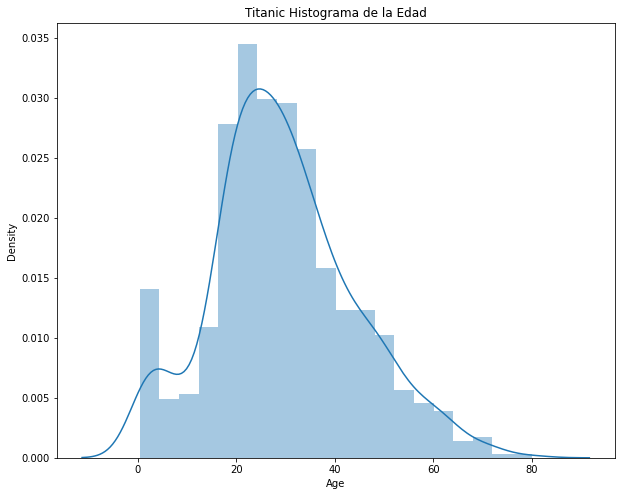

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(titanic['Age'])
plt.title('Titanic Histograma de la Edad')
plt.show()

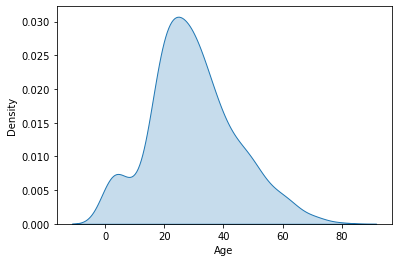

In [ ]:
# Si sólo queremos la función de densidad
#plt.figure(figsize=(6,3))
sns.kdeplot(titanic['Age'],shade=True)
#plt.title('Titanic Densidad de la Edad')
#plt.xlabel('Age');

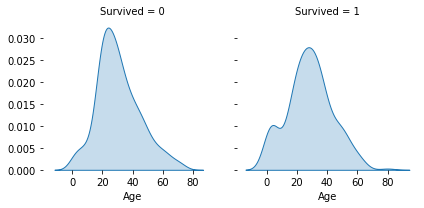

In [ ]:
g = sns.FacetGrid(titanic, col="Survived", height=3)
g.map(sns.kdeplot, 'Age', shade=True)
g.despine(left=True,bottom=True);

<Figure size 576x288 with 0 Axes>

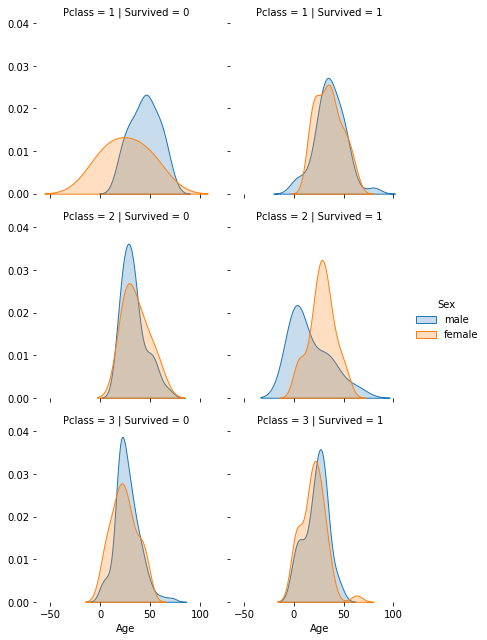

In [ ]:
plt.figure(figsize=(8,4))
g = sns.FacetGrid(titanic, col='Survived', row='Pclass', hue='Sex', height=3)
g.map(sns.kdeplot, 'Age', shade=True).add_legend()
g.despine(left=True, bottom=True)
plt.show()

### Boxplot

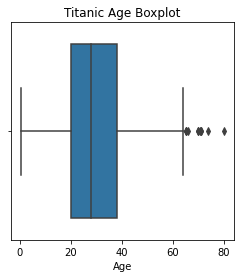

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(x=titanic['Age'])#,orient='v')
plt.title('Titanic Age Boxplot')
plt.show()

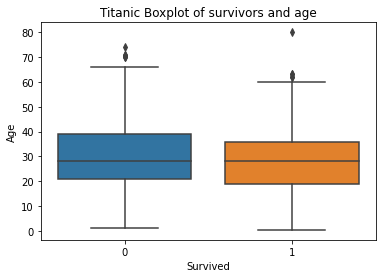

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived',y='Age',data=titanic)
plt.title('Titanic Boxplot of survivors and age')
plt.show()

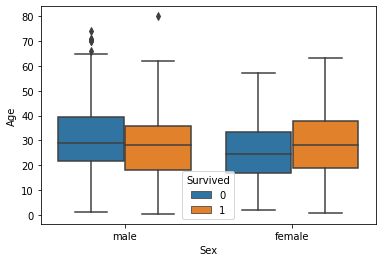

In [ ]:
sns.boxplot(x='Sex',  y='Age', data=titanic, hue='Survived')

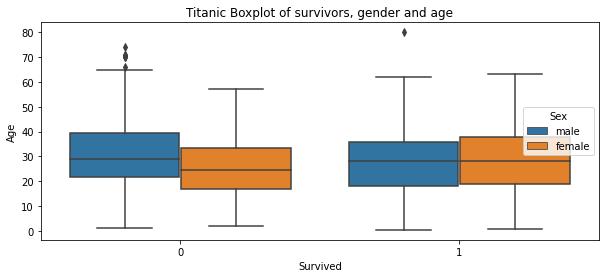

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Survived',y='Age',hue='Sex',data=titanic)
plt.title('Titanic Boxplot of survivors, gender and age')
plt.show()

### Bar chart

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


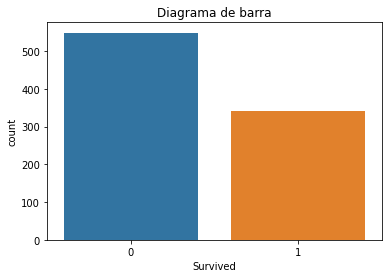

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot('Survived',data=titanic)
plt.title('Diagrama de barra')
plt.show()

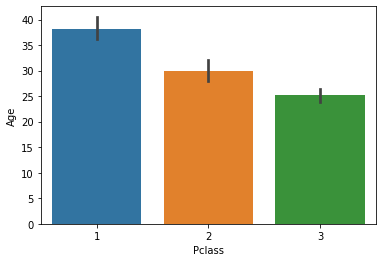

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(y='Age',x='Pclass',data=titanic)
plt.show()

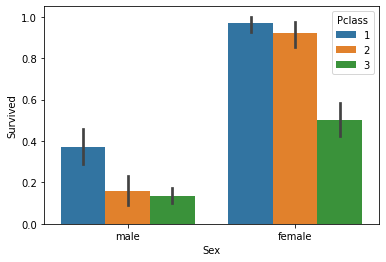

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(y='Survived',x='Sex',hue='Pclass',data=titanic)
plt.show()

### Heatmap

In [ ]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


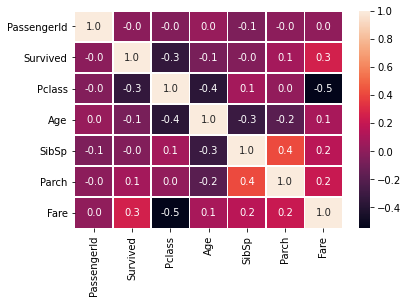

In [ ]:
plt.figure()
sns.heatmap(titanic.corr(),annot=True, linewidth=0.5,fmt='.1f')
plt.show()

### Scatterplot

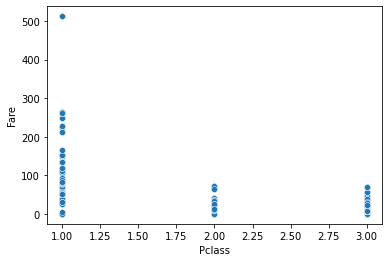

In [ ]:
sns.scatterplot(x='Pclass', y='Fare', data=titanic)

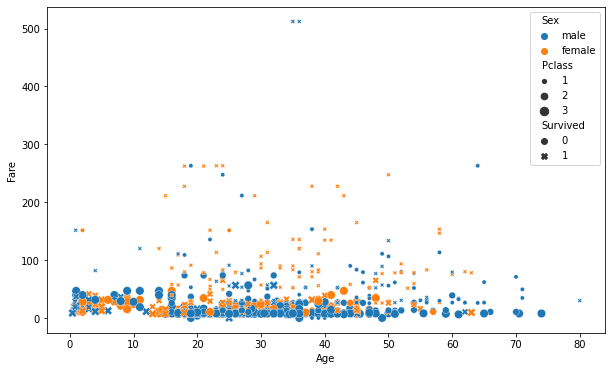

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', hue='Sex', style='Survived', size='Pclass' ,data=titanic)
plt.show()

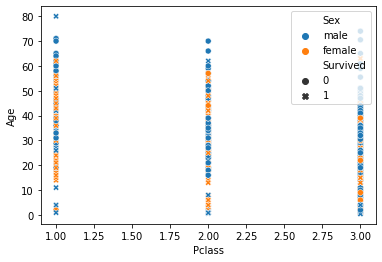

In [ ]:
plt.figure()
sns.scatterplot(x='Pclass', y='Age', hue='Sex', style='Survived',data=titanic)
plt.legend(loc='upper right')
plt.show()

# Pairplot

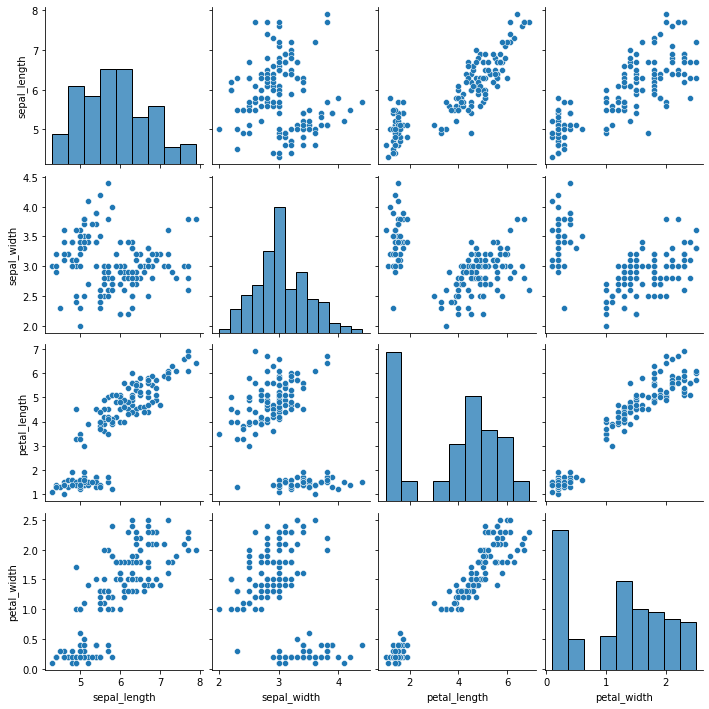

In [ ]:
iris= sns.load_dataset("iris")
sns.pairplot(iris)

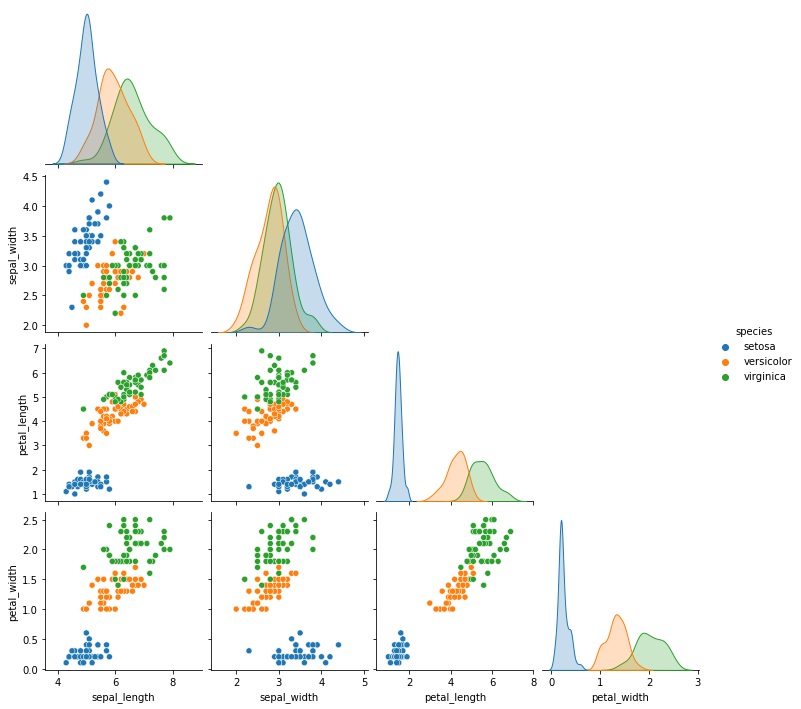

In [ ]:
sns.pairplot(iris, hue='species', corner='hist')

regresion grafico

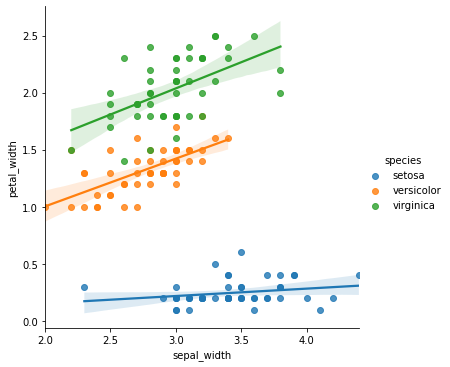

In [ ]:
sns.lmplot(data=iris, x='sepal_width', y='petal_width', hue='species' )

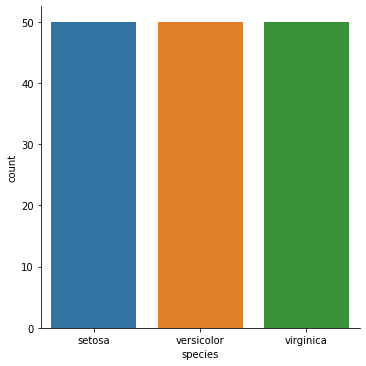

In [ ]:
sns.catplot(x=iris.species, kind='count', data=iris  )

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px
fig = px.scatter(titanic,x='Age',y='Fare', color='Sex', size='Pclass')
fig.show()

# Mi primer Mapa



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium  #  para hacer mapas

In [ ]:
mapa_bogota=folium.Map(location=[4.61,-74.082], zoom_start=13, tiles= 'OpenStreetMap')
mapa_bogota
# cartodb positron , 'Stamen Terrain', 'OpenStreetMap'

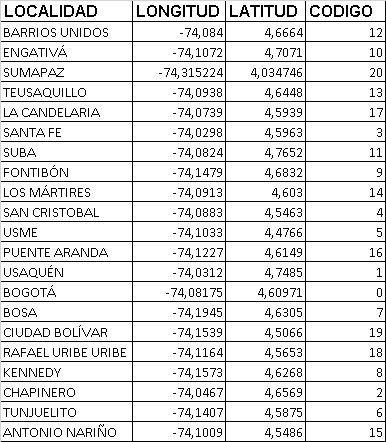

In [ ]:
# Creemos un dataframe
localidad=['Ciudad Bolívar', 'Fontibon', 'Usaquen']
latitud=[4.5066, 4.6832, 4.7485 ]
longitud=[-74.1539, -74.1479, -74.0312]

In [ ]:
# vamos crear el dataframe de nombre df vacío()
df=pd.DataFrame()
df['Localidad']=localidad
df['Latitud']=latitud
df['Longitud']=longitud
df

,Localidad,Latitud,Longitud
0,Ciudad Bolívar,4.5066,-74.1539
1,Fontibon,4.6832,-74.1479
2,Usaquen,4.7485,-74.0312


In [ ]:
mapa_bogota=folium.Map(location=[4.57,-74.082], zoom_start=13, tiles='OpenStreetMap')
# vamos agregar un marcador (Ciudad Bolivar)
folium.Marker(location=[df['Latitud'][0], df['Longitud'][0]], tooltip='Ciudad Bolívar' ).add_to(mapa_bogota)
mapa_bogota

In [ ]:
mapa_bogota=folium.Map(location=[4.57,-74.082], zoom_start=13, tiles='OpenStreetMap')
# vamos agregar los tres marcadores usando un ciclo for

for i in range(3):
    folium.Marker(location=[df['Latitud'][i], df['Longitud'][i]], tooltip=df['Localidad'][i] ).add_to(mapa_bogota)
mapa_bogota

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv

In [ ]:
mi_report=sv.analyze(titanic)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
mi_report

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



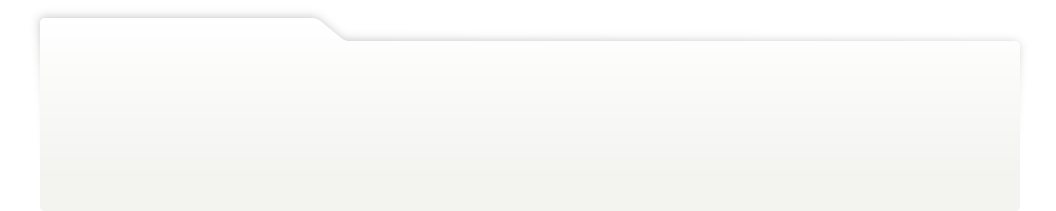
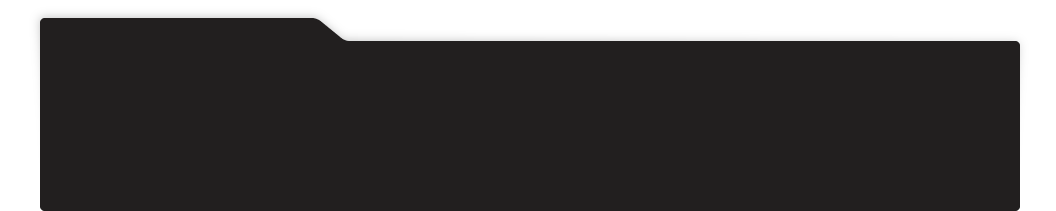
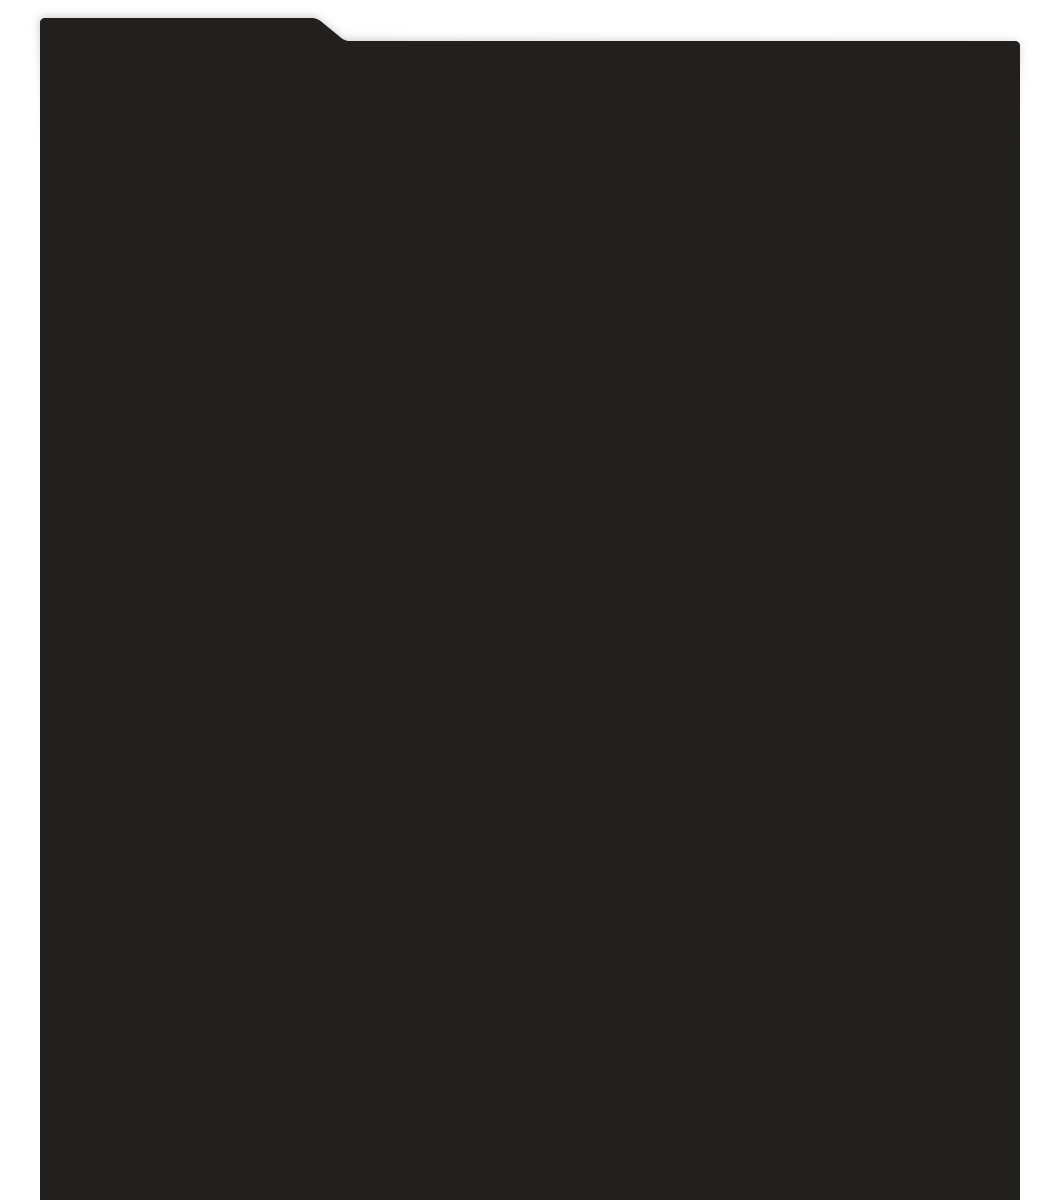
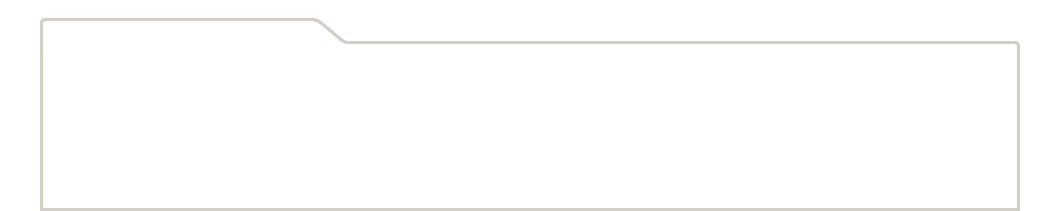
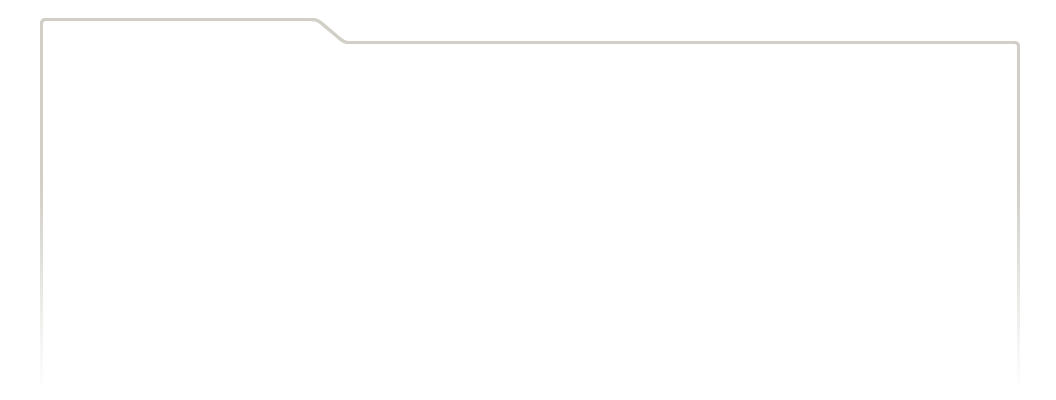
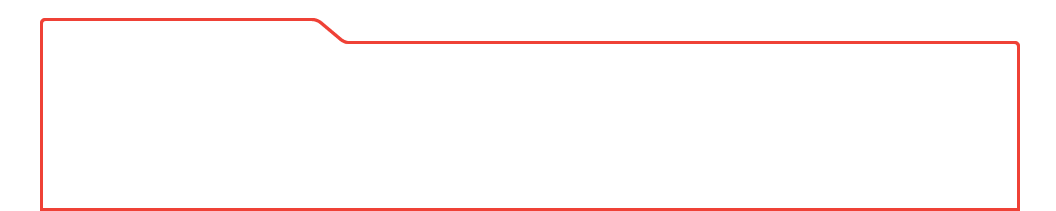
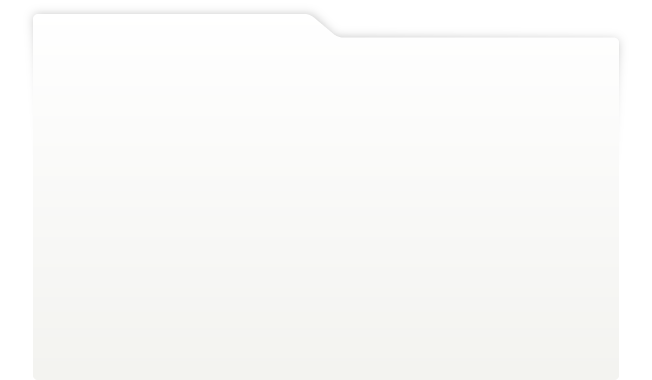
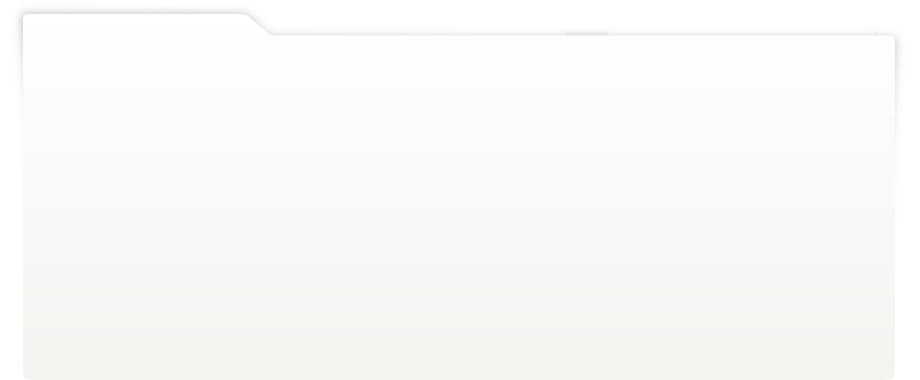
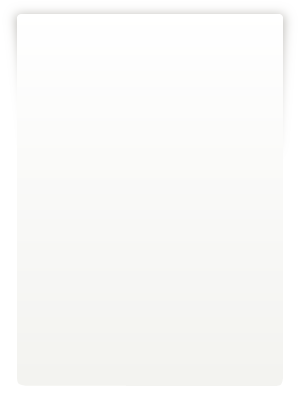
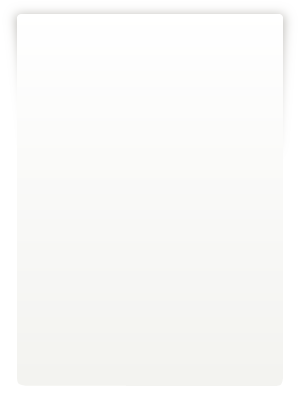
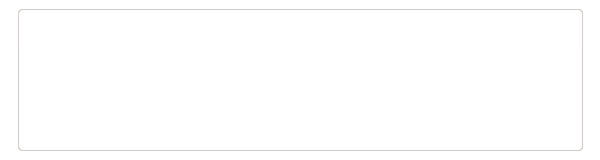
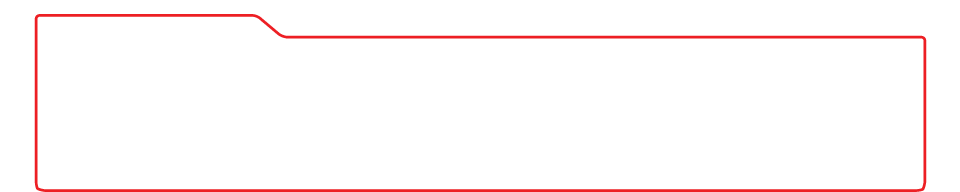
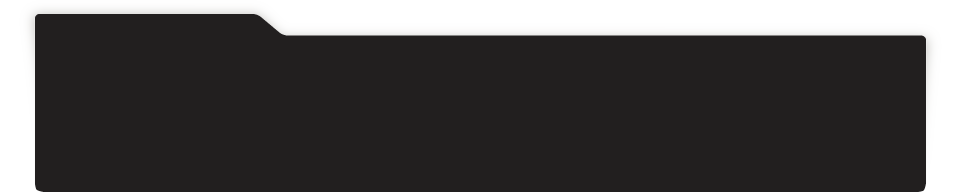
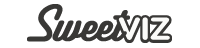
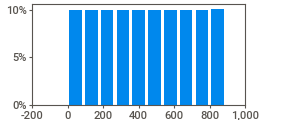
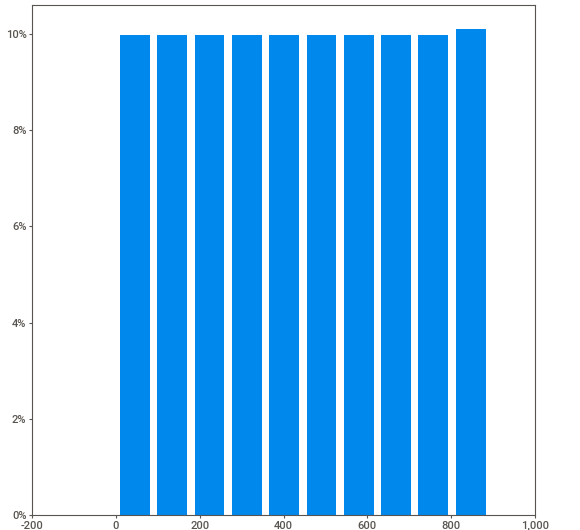
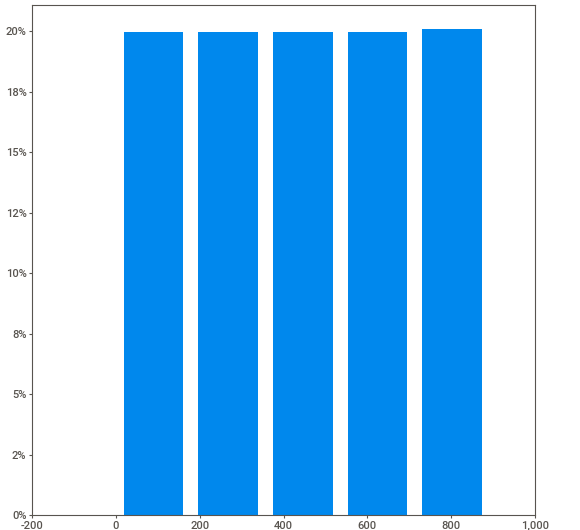
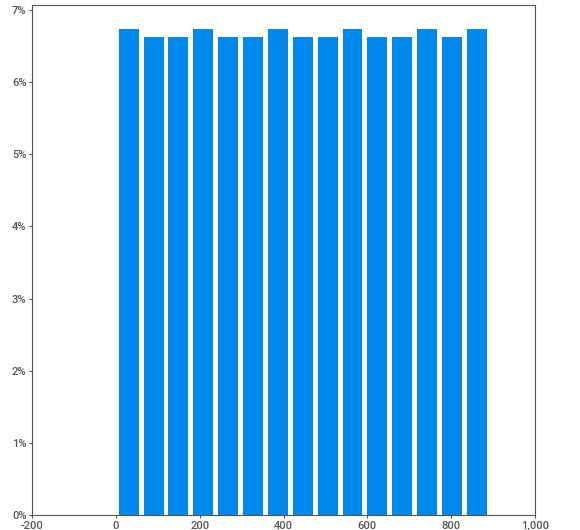
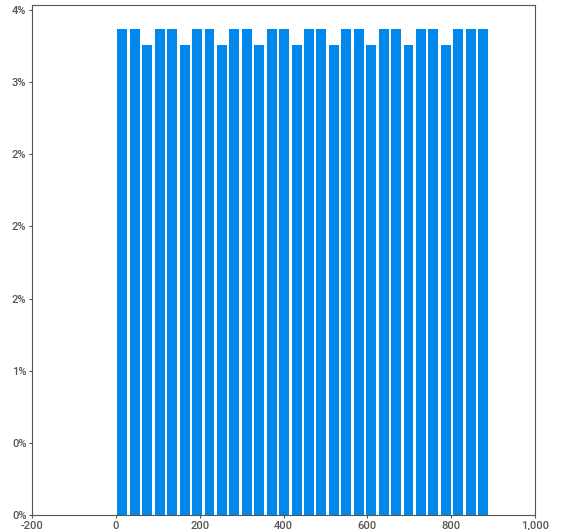
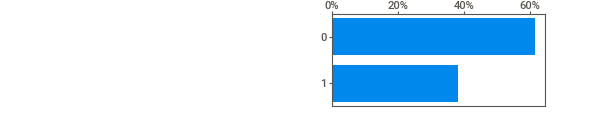
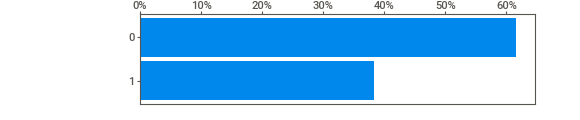
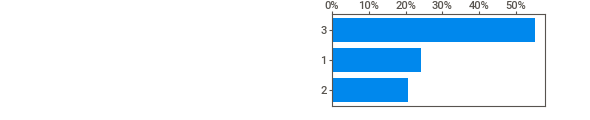
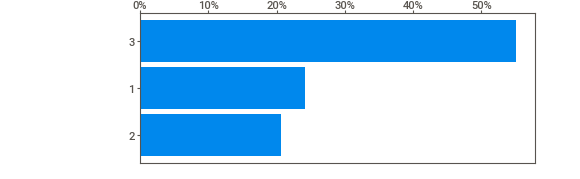
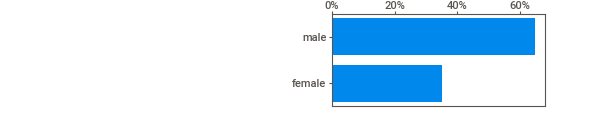
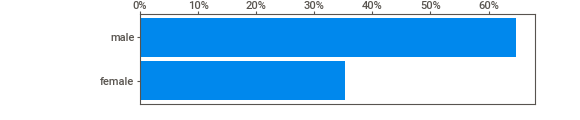
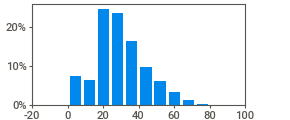
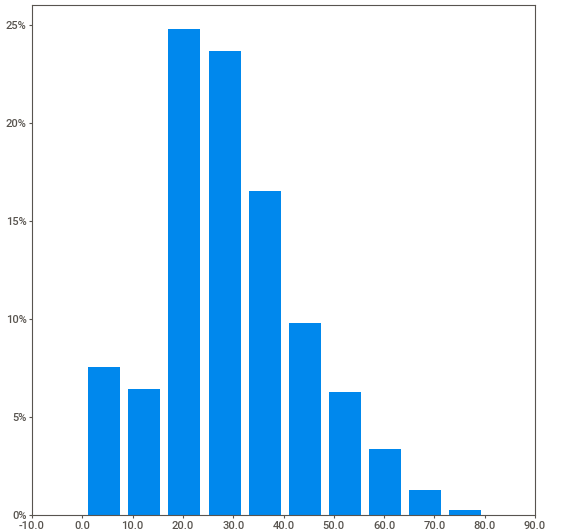
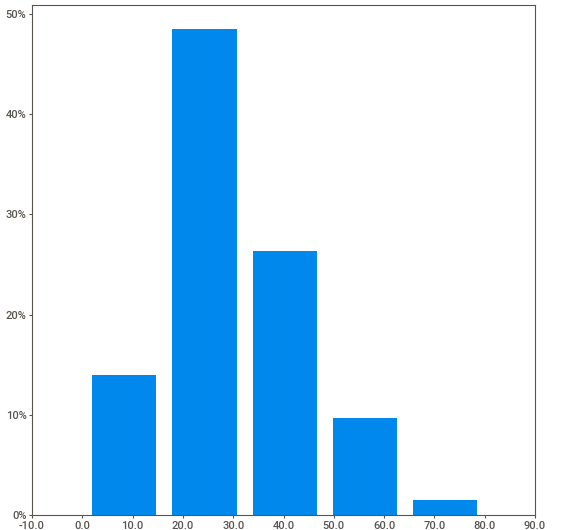
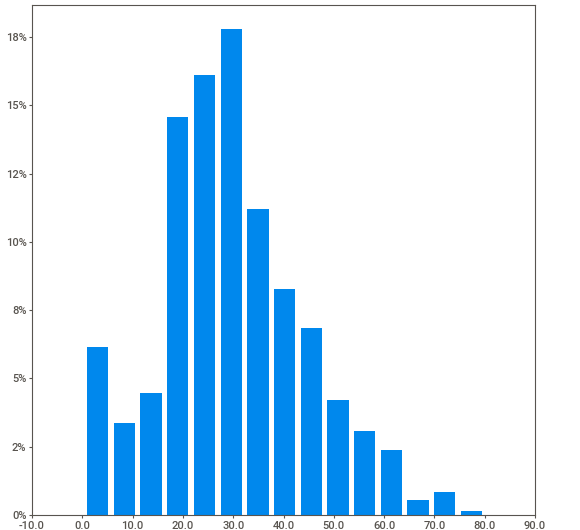
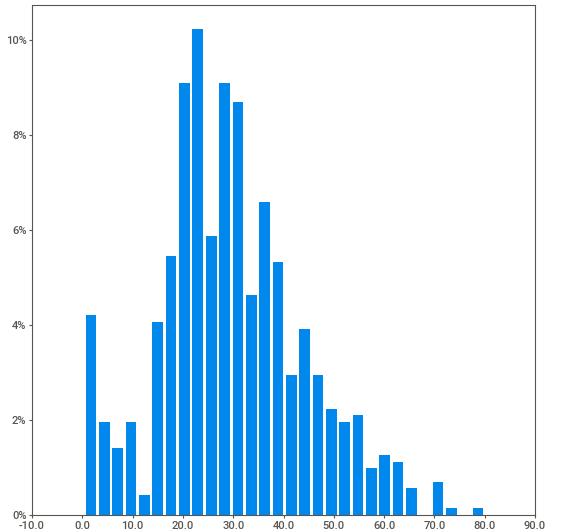
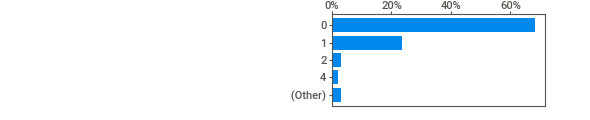
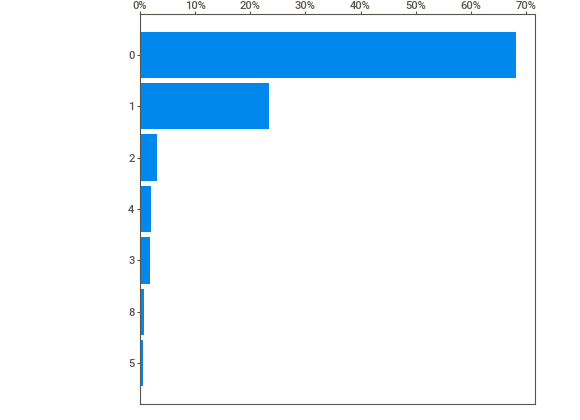
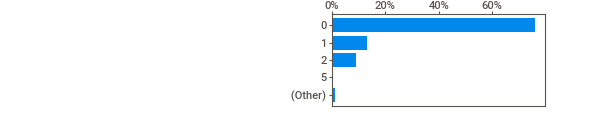
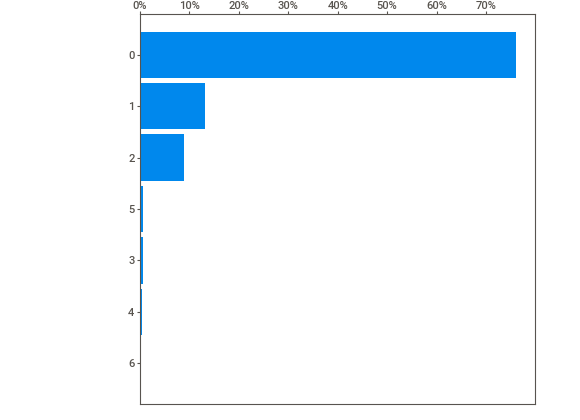
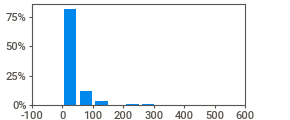
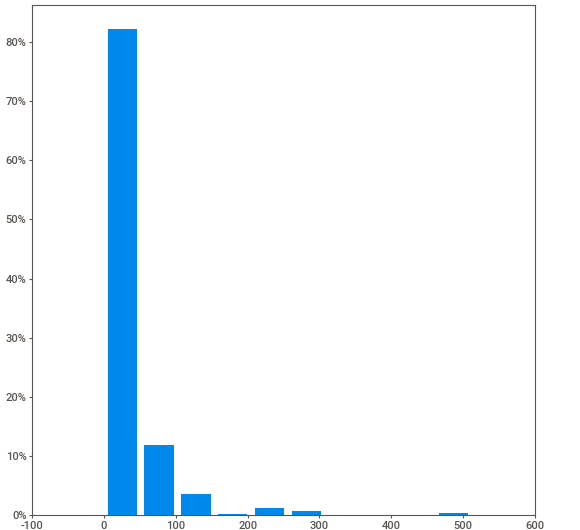
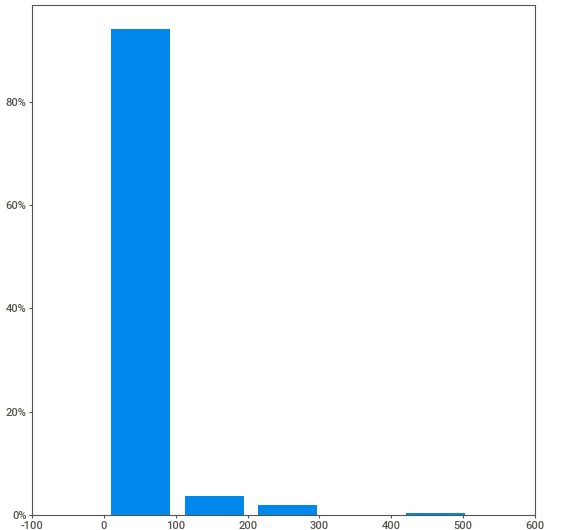
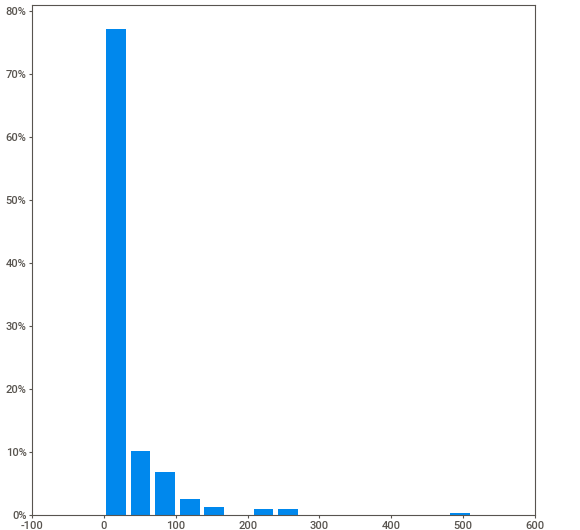
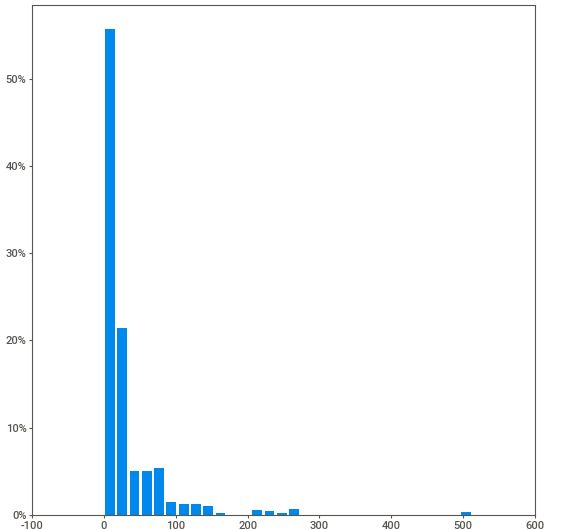
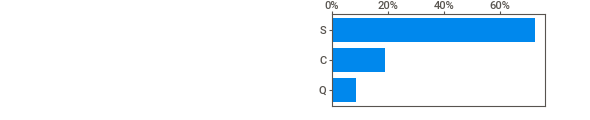
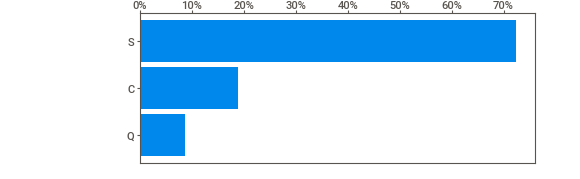
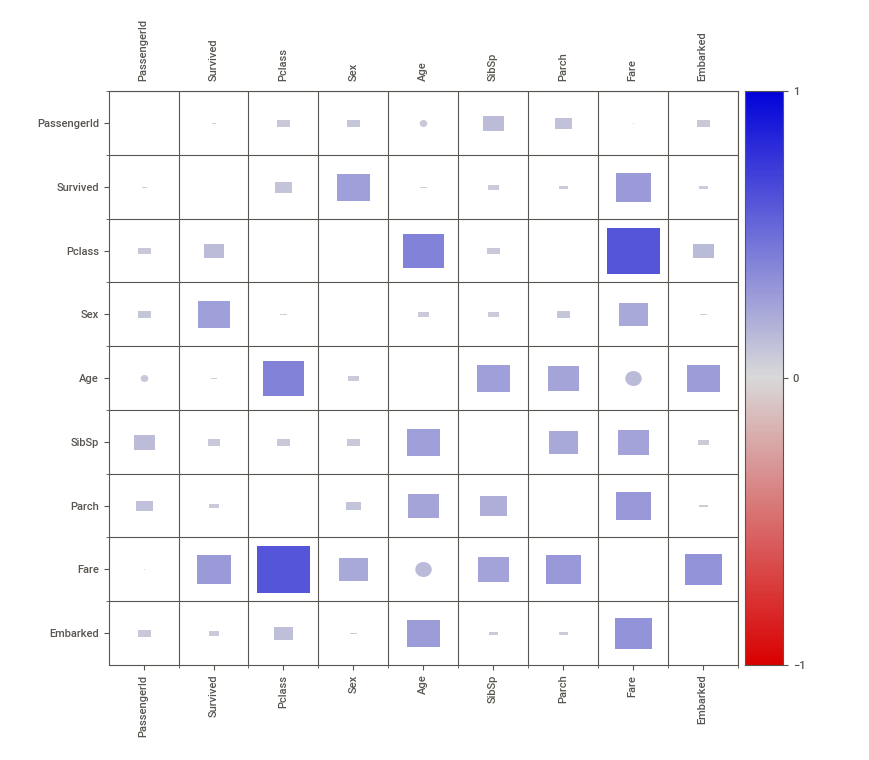
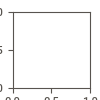

In [ ]:
from IPython.display import HTML
mi_report.show_html()
display(HTML('SWEETVIZ_REPORT.html'))

In [ ]:
!pip install chart_studio -q

Más avanzado y como referencia

https://drive.google.com/file/d/1d3WQLJRrNChR3IOlk4a-VqCeKlfN8JQv/view?usp=sharing